# Основы работы с pandas

## Задания для выполнения
2.	Считать файл в pandas DataFrame

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('titanic.csv', index_col = 'PassengerId')
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


3.	Ознакомиться с основными параметрами датасета, используя функции библиотеки pandas, включая следующие данные:
a.	Количество точек данных (измерений) в наборе
b.	Количество полей данных (атрибутов)
c.	Тип данных каждого поля, шкала каждого поля
d.	Количество отсутствующих значений для каждого поля
e.	Количество и названия константных и уникальных полей

In [3]:
df.info() #Количество точек данных (измерений) в наборе = 891
          #Количество полей данных (атрибутов) = 11
          #Тип данных каждого поля, шкала каждого поля = >>>

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
# или так 
df.shape

(891, 11)

In [5]:
df.isna().sum() #Количество отсутствующих значений для каждого поля

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [6]:
#Количество и названия константных и уникальных полей
for i in list(df):
    print(f'Unique in {i}:',len(df[i].unique()))
    print(df[i].value_counts())
    print('\n\n\n')

Unique in Survived: 2
0    549
1    342
Name: Survived, dtype: int64




Unique in Pclass: 3
3    491
1    216
2    184
Name: Pclass, dtype: int64




Unique in Name: 891
Bjornstrom-Steffansson, Mr. Mauritz Hakan            1
Goldenberg, Mrs. Samuel L (Edwiga Grabowska)         1
Walker, Mr. William Anderson                         1
Palsson, Miss. Stina Viola                           1
Giglio, Mr. Victor                                   1
                                                    ..
Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)    1
Markoff, Mr. Marin                                   1
Heininen, Miss. Wendla Maria                         1
Sage, Miss. Constance Gladys                         1
Behr, Mr. Karl Howell                                1
Name: Name, Length: 891, dtype: int64




Unique in Sex: 2
male      577
female    314
Name: Sex, dtype: int64




Unique in Age: 89
24.00    30
22.00    27
18.00    26
28.00    25
19.00    25
         ..
55.50     1
74.00  

4.	Удалить из набора поля, не несущие информативной нагрузки - содержащие уникальные либо константные значения

In [7]:
del df['Name']
del df['Ticket']
del df['Cabin']

In [8]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


5.	Заменить возраст пассажиров на год рождения

In [9]:
# Titanic потанул в 1912г
df['Age'] = 1912 - df['Age']

In [10]:
df['Age']

PassengerId
1      1890.0
2      1874.0
3      1886.0
4      1877.0
5      1877.0
        ...  
887    1885.0
888    1893.0
889       NaN
890    1886.0
891    1880.0
Name: Age, Length: 891, dtype: float64

6.	Переименовать все названия колонок на русском языке


In [11]:
df.columns = ['Виживший','Соц-эконом статус','Пол','Год рождения','Кол-во родств 2-го порядка','Кол-во родств 1-го порядка','Цена билета','Порт посадки']

In [12]:
df.head()

,Виживший,Соц-эконом статус,Пол,Год рождения,Кол-во родств 2-го порядка,Кол-во родств 1-го порядка,Цена билета,Порт посадки
PassengerId,,,,,,,,
1,0,3,male,1890.0,1,0,7.2500,S
2,1,1,female,1874.0,1,0,71.2833,C
3,1,3,female,1886.0,0,0,7.9250,S
4,1,1,female,1877.0,1,0,53.1000,S
5,0,3,male,1877.0,0,0,8.0500,S


7.	Заменить все отсутствующие данные средним значением (в случае числового поля) либо самым распространенным в категориальных полях.


In [13]:
df.dtypes

Виживший                        int64
Соц-эконом статус               int64
Пол                            object
Год рождения                  float64
Кол-во родств 2-го порядка      int64
Кол-во родств 1-го порядка      int64
Цена билета                   float64
Порт посадки                   object
dtype: object

In [14]:
df.isna().sum()

Виживший                        0
Соц-эконом статус               0
Пол                             0
Год рождения                  177
Кол-во родств 2-го порядка      0
Кол-во родств 1-го порядка      0
Цена билета                     0
Порт посадки                    2
dtype: int64

In [15]:
df['Год рождения'].fillna(df['Год рождения'].median(), inplace=True)
df['Порт посадки'].fillna(df['Порт посадки'].mode()[0], inplace=True)

In [16]:
df.isna().sum()

Виживший                      0
Соц-эконом статус             0
Пол                           0
Год рождения                  0
Кол-во родств 2-го порядка    0
Кол-во родств 1-го порядка    0
Цена билета                   0
Порт посадки                  0
dtype: int64

8.	Сохранить получившийся набор данных в формате CSV

In [17]:
df.to_csv('titanic_.csv', encoding='utf-8')

9.	Открыть данный файл в программе Microsoft Excel и сохранить в формате .xlsx

In [18]:
df.to_excel('titanic_.xlsx', encoding='utf-8')

10.	Считать файл .xlsx в новый DataFrame

In [19]:
edf = pd.read_excel('titanic_.xlsx', index_col=0)
edf

,Виживший,Соц-эконом статус,Пол,Год рождения,Кол-во родств 2-го порядка,Кол-во родств 1-го порядка,Цена билета,Порт посадки
PassengerId,,,,,,,,
1,0,3,male,1890.0,1,0,7.2500,S
2,1,1,female,1874.0,1,0,71.2833,C
3,1,3,female,1886.0,0,0,7.9250,S
4,1,1,female,1877.0,1,0,53.1000,S
5,0,3,male,1877.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,1885.0,0,0,13.0000,S
888,1,1,female,1893.0,0,0,30.0000,S
889,0,3,female,1884.0,1,2,23.4500,S


## Контрольные вопросы
1.	Какие две главные структуры данных используются в pandas? В чем их отличие?

Series — это структура, используемая для работы с последовательностью одномерных данных

Dataframe — более сложная и подходит для нескольких измерений.

2.	Назовите основные функции чтения данных из файлов

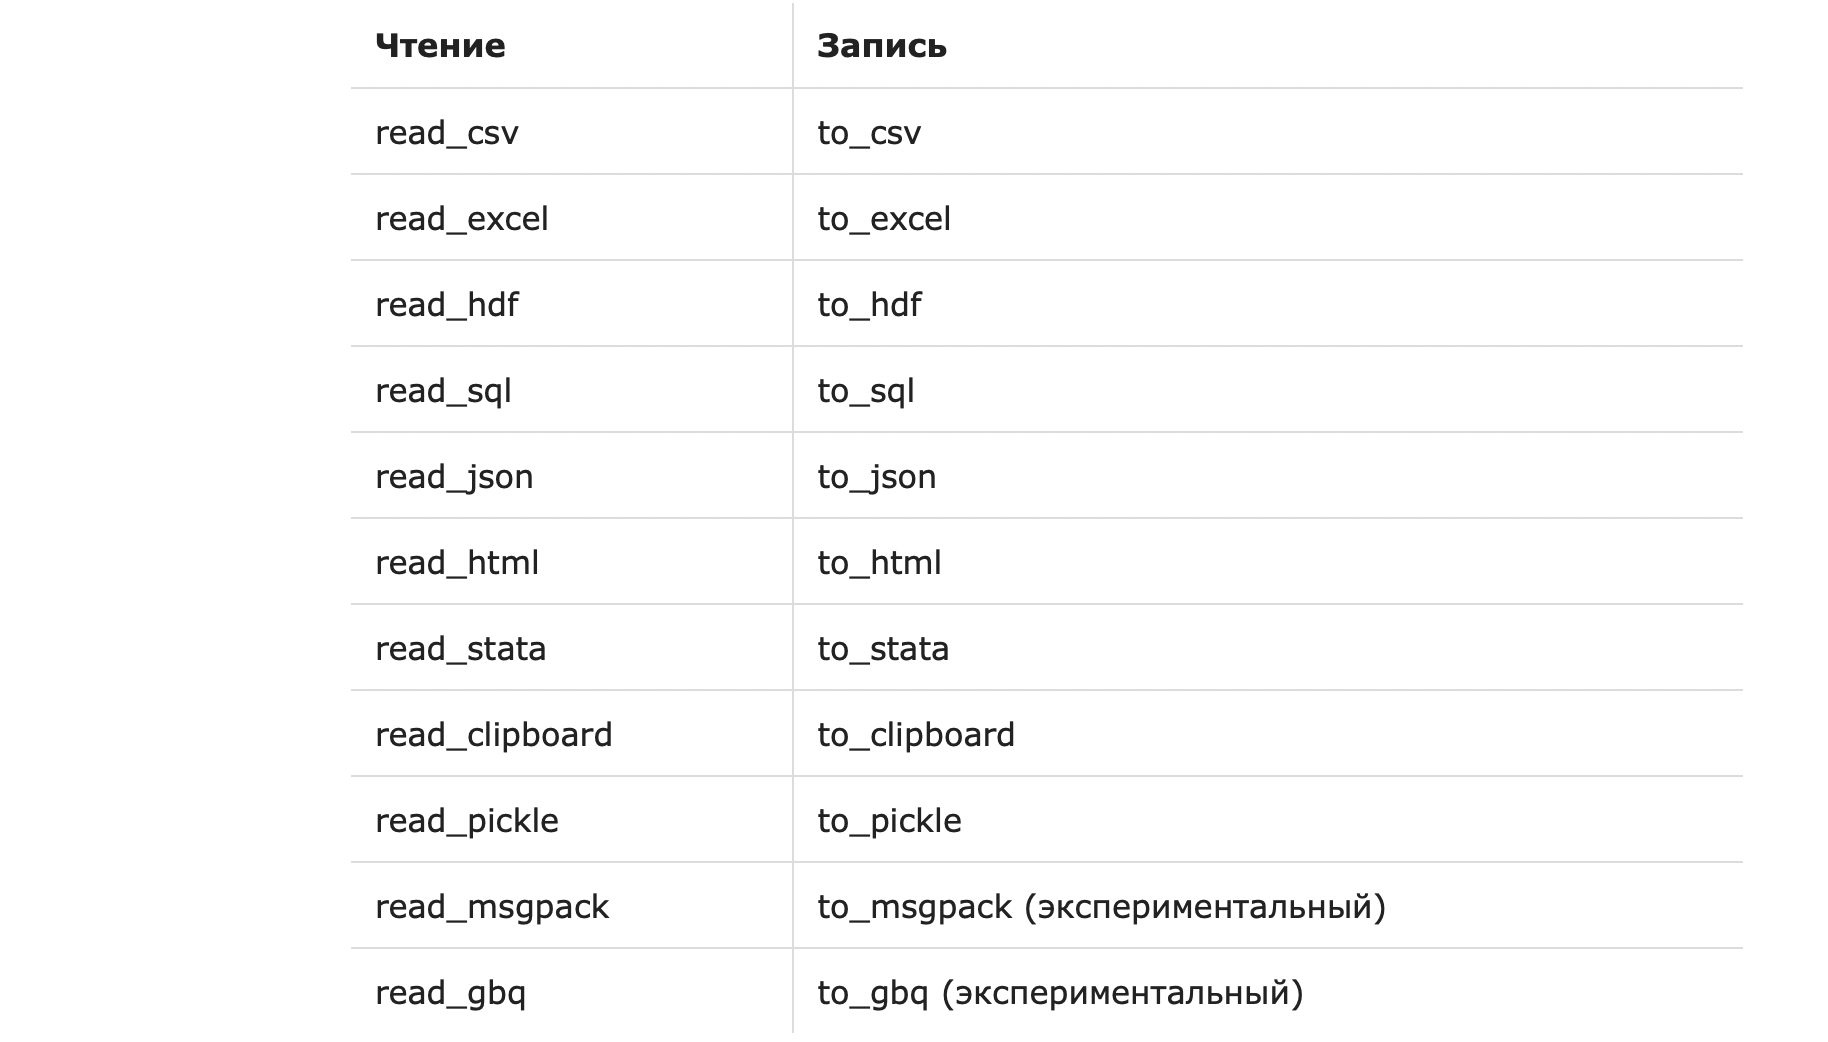

3.	Напишите функцию записи набора данных А в файл с разделителями-запятыми

In [20]:
def reader_csv(name):
    return pd.read_csv(name, delimiter = ',')

4.	Как называется функция, выводящая на экран первые N строчек набора данных?

In [21]:
# head.(N)

5.	С помощью какой функции можно удалить поле набора данных? А строку?

In [22]:
# df.drop(['A'], axis = 1) конкретный столбец 
# df.drop (columns = ['A', 'B'])
# df.drop(df.columns[[0, 4, 2]], axis = 1, inplace = True)
# del df['A']

# df.drop(labels = ['A'/n], axis = 0)
# df.drop(['A'], axis = 0)

6.	Напишите участок кода, демонстрирующий возможность добавления новой строки к набору данных. 

In [23]:
# one_more_person = {'Виживший': '1','Соц-эконом статус': '1','Пол': 'male','Год рождения': '1892','Кол-во родств 2-го порядка': '1','Кол-во родств 1-го порядка': '0','Цена билета': '75.9','Порт посадки': 'C'}
# df = df.append(one_more_person, ignore_index=True)

# ignore_index = True – позволяет исключить ошибку 
# «Can only append a Series if ignore_index = True or if the Series has a name»


# для нескольких строк
# add_df = pd.DataFrame({'Виживший': ['1', '0'],'Соц-эконом статус': ['1', '0'],'Пол': ['male', 'male'],'Год рождения': ['1892','1888'],'Кол-во родств 2-го порядка': ['1', '0'],'Кол-во родств 1-го порядка': ['0','0'],'Цена билета': ['75.9','1046.9'],'Порт посадки': ['C','S']})
# df = df.append(add_df, ignore_index = True)

7.	Напишите участок кода, демонстрирующий возможность добавления новой колонки (поля) к набору данных. 

In [24]:
# df["новое имя столбца"] = [значения через запятую]